Import libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules

load data

In [67]:
data = pd.read_csv('basket_analysis.csv')
data

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


In [68]:
data = data.drop(columns=['Unnamed: 0'])
data

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Apple         999 non-null    bool 
 1   Bread         999 non-null    bool 
 2   Butter        999 non-null    bool 
 3   Cheese        999 non-null    bool 
 4   Corn          999 non-null    bool 
 5   Dill          999 non-null    bool 
 6   Eggs          999 non-null    bool 
 7   Ice cream     999 non-null    bool 
 8   Kidney Beans  999 non-null    bool 
 9   Milk          999 non-null    bool 
 10  Nutmeg        999 non-null    bool 
 11  Onion         999 non-null    bool 
 12  Sugar         999 non-null    bool 
 13  Unicorn       999 non-null    bool 
 14  Yogurt        999 non-null    bool 
 15  chocolate     999 non-null    bool 
dtypes: bool(16)
memory usage: 15.7 KB


Generating frequent itemsets

In [70]:
frequent_itemsets = apriori(data, min_support=0.2, use_colnames=True)

In [71]:
frequent_itemsets

,support,itemsets
0,0.383383,(Apple)
1,0.384384,(Bread)
2,0.420420,(Butter)
3,0.404404,(Cheese)
4,0.407407,(Corn)
5,0.398398,(Dill)
6,0.384384,(Eggs)
7,0.410410,(Ice cream)
8,0.408408,(Kidney Beans)
9,0.405405,(Milk)


Generating association rules

In [72]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.2)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(Butter),(Ice cream),0.207207,0.492857,1.200889
1,(Ice cream),(Butter),0.207207,0.504878,1.200889
2,(Butter),(Kidney Beans),0.202202,0.480952,1.177626
3,(Kidney Beans),(Butter),0.202202,0.495098,1.177626
4,(Butter),(chocolate),0.202202,0.480952,1.141262
5,(chocolate),(Butter),0.202202,0.479810,1.141262
6,(Cheese),(Kidney Beans),0.200200,0.495050,1.212143
7,(Kidney Beans),(Cheese),0.200200,0.490196,1.212143
8,(chocolate),(Ice cream),0.202202,0.479810,1.169098
9,(Ice cream),(chocolate),0.202202,0.492683,1.169098


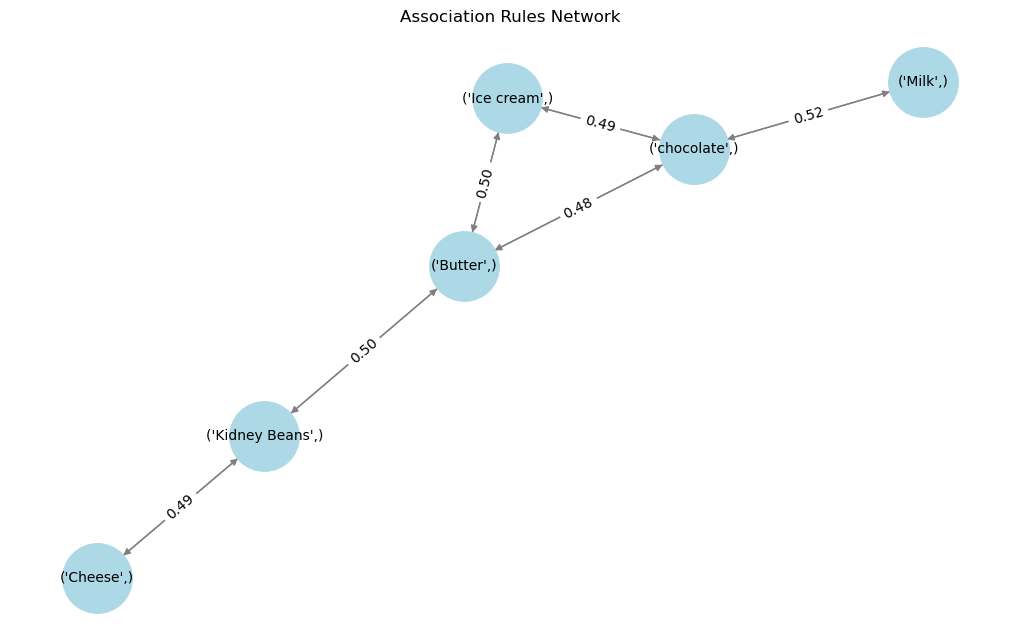

In [73]:
# Visualizing association rules as a network graph
G = nx.DiGraph()
for _, row in rules.iterrows():
    G.add_edge(tuple(row['antecedents']), tuple(row['consequents']), weight=row['confidence'])
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2500, font_size=10)
edge_labels = {(tuple(row['antecedents']), tuple(row['consequents'])): f"{row['confidence']:.2f}" 
               for _, row in rules.iterrows()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Association Rules Network")
plt.show()